# collecting data

In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [42]:
##Load the dataset from the csv file using pandas
diabetes=pd.read_csv(r'C:\Users\Vikas\Downloads\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


diabetes dataframe analysis:-
<li>The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
<li>all patients here are females
<li>The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.                                
        

In [43]:
#print the column
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
#getting information about the entire data frame
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


diabetes dataframe information:- 
<li> #pregnancies:-Number of times pregnant
    <li>#Glucose:-Glucose concentration a 2 hours in an oral glucose tolerance test
        <li>#BloodPressure:-Diastolic blood pressure (mm Hg)
            <li>#SkinThickness:-Triceps skin fold thickness (mm)
                <li>#Insulin:-2-Hour serum insulin (mu U/ml)
                    <li>#BMI:-Body mass index (weight in kg/(height in m)^2)
                        <li>#DiabetesPedigreeFunction
                            <li>#Outcome:-Class variable (0 or 1)

<li>in this information we clearly see that there are no missing value

In [46]:
print("dimension of diabetes data:",format(diabetes.shape))

dimension of diabetes data: (768, 9)


it means dataset contain 768 rows and 9 columns

# Analyzing Data

creating different plot to checking relationship between variable

In [47]:
diabetes['Age'].min(),diabetes['Age'].max() #find the minimum and maximum age of passenger

(21, 81)

In [68]:
diabetes.describe() #here,we describe the full information about dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
#count the patient which have diabetes
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Outcome 0 means No diabetes, outcome 1 means diabetes

In [49]:
diabetes['Outcome'].value_counts() * 100/len(diabetes) #count patient suffering from diabetes in percentage

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

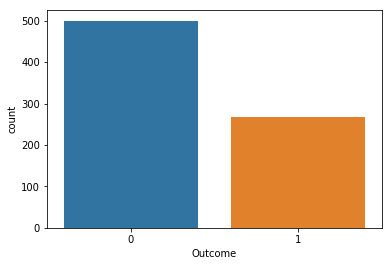

In [50]:
sns.countplot(x='Outcome',data=diabetes) #use seaborn to build bar on outcome

In [51]:
diabetes[diabetes.Age==31] #show the patient which age ==31

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
48,7,103,66,32,0,39.1,0.344,31,1
57,0,100,88,60,110,46.8,0.962,31,0
99,1,122,90,51,220,49.7,0.325,31,1
135,2,125,60,20,140,33.8,0.088,31,0
188,8,109,76,39,114,27.9,0.640,31,1
228,4,197,70,39,744,36.7,2.329,31,0
292,2,128,78,37,182,43.3,1.224,31,1


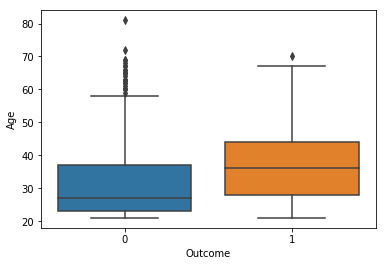

In [52]:
#sns.set_style('whitegrid') #it show the white grid line
sns.boxplot(x = 'Outcome',y = 'Age',data = diabetes) #compare the outcome with age

the above boxplot shows that females in higher age group tend to have diabetes

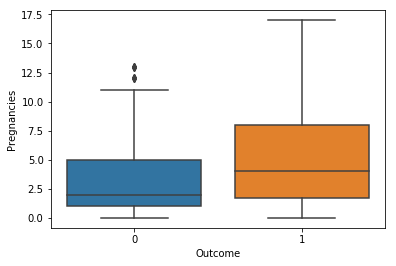

In [53]:
sns.boxplot(x = 'Outcome',y = 'Pregnancies',data = diabetes) #compare the outcome with pregnancies

The above boxplot shows the relationship between number of pregnancies and whether or not a patient is having diabetes

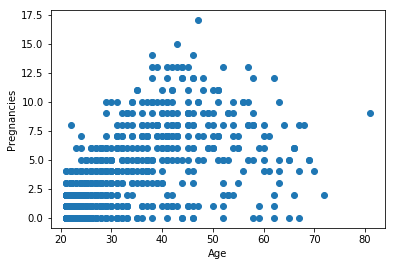

In [54]:
#show the pregnancies with age
plt.scatter(x='Age',y='Pregnancies',data=diabetes)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Pregnancies',fontsize=10)
plt.show()

here,graph clearly show that patient whose age between 35 to 60 have more times pregnant

In [55]:
#sns.jointplot(x='Age',y='Pregnancies',data=diabetes,kind='scatter')

In [56]:
#Plot a swarm plot of 'Age' with 'Outcome' on the x-axis
#sns.swarmplot(x='Outcome',y='Age',data=diabetes)

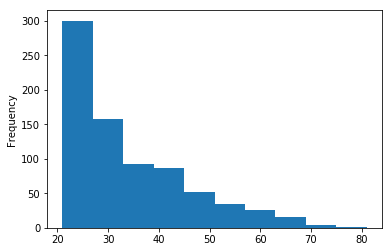

In [57]:
#analysis of age colomn
diabetes['Age'].plot.hist() 

from figure we see that more female are young

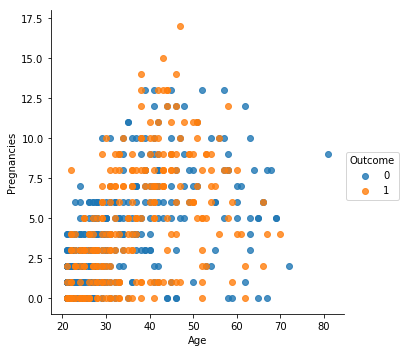

In [58]:
##Use seaborn to plot a scatter plot of 'Age' against 'Pregnancies', colored by 'Outcome'
sns.lmplot(x='Age',y='Pregnancies',data=diabetes,hue='Outcome',fit_reg=False)

female whose pregnant more times have more diabetes

# Data Wrangling

clean the data by removing the NaN values and unnecessary columns in the dataset

In [59]:
#now check my data has null or not null or checking missing value
diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [60]:
#now check the patient who have null value in each  colomn
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

in my data there is no null value so data cleaning is not required

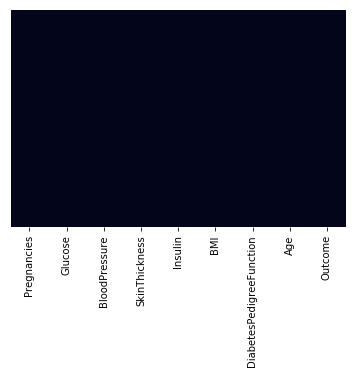

In [61]:
#now we check in heatmap any NaN values is present or not
sns.heatmap(diabetes.isnull(),yticklabels=False,cbar=False) #cbar used to removing bar

now we clearly see that it is entirely black.so there is no null value in dataset

# TRAIN TEST SPLIT

now time to split our data into training and test set

In [62]:
x=diabetes.drop('Outcome',axis=1) #outcome is because it is a categorical and response value
y=diabetes['Outcome'] ##we take outcome because we predict patient has diabetes or not

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Logistic Regression

In [64]:
#now analysis the logistic regression
from sklearn.linear_model import LogisticRegression
#build the model
logmodel=LogisticRegression() #create instance model of logisticregression
logmodel.fit(x_train,y_train) #fit the model in x_train nd y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

here,we see all the detail of logistic regression

In [65]:
#now predict the model
prediction=logmodel.predict(x_test) #prediction always do on test

till now we do import the logisticregression,create the model,fit the model and predict the model

In [66]:
#now we evaluate how model has been performing by simply calculating accuracy nd classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87       130
          1       0.77      0.58      0.66        62

avg / total       0.80      0.81      0.80       192



precision means positive predictive value
<li> recall means sensitivity
    <li>f1-score is a measure of test accuracy
        <li>support means number of occurances of each class


In [67]:
#now print confusion report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[119  11]
 [ 26  36]]


confusion metrix is just 2*2 metrix with four output
<li>when calculate accurcy just add 119 nd 36 of confusion metrix and divided by whole sum of confusion metrix

In [ ]:
# Accuracy Score

In [28]:
#now calculate the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.8072916666666666


we got accuracy 0.80,it is good not bad

In [29]:
print(accuracy_score(y_test,prediction)*100) #change them into %

80.72916666666666


# k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [30]:
#KNN=5
#first import kneighborsclassifier from sklearn.neighbors library
from sklearn.neighbors import KNeighborsClassifier
#now initalize the class with one parameter i.e n_neighbors,this is actually value of K
#knn=KNeighborsClassifier(n_neighbors=5)
#fit the model with data
#knn.fit(x_train,y_train)
#predict the response value for the observation in x
#y_pred=knn.predict(x_train)
#print(metrics.accuracy_score(y_train,y_pred)) #print the accuracy score

In [31]:
#KNN=1
#from sklearn.neighbors import KNeighborsClassifier
#knn=KNeighborsClassifier(n_neighbors=1)
#knn.fit(x_train,y_train)
#y_pred=knn.predict(x_train)
#print(metrics.accuracy_score(y_train,y_pred))

In above comparison KNN=5 nd KNN=1 we get 100% accuracy in knn=1 so,knn=1 is best model

In [32]:
#but we dont't know which model is best for data so use all k value 1 to 40


In [33]:
#KNN=(1,11)
#we make a training_accuracy and test_accuracy list where result is appended
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10(calculating training nd test accuracy for K values between 1 and 11)
for i in range(1,11):
    #build the model
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))

The above script executes a loop from 1 to 11.In each iteration the mean error(training & test accuracy) for predicted values of test set is calculated and the result is appended to the error(trainig & test accuracy) list.

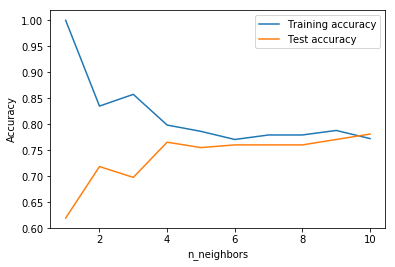

In [34]:
#now plot the training_accuracy nd test_accuracy value against K values
#plt.figure(figsize=(12,6)) #it is used for image size
plt.plot(range(1,11),training_accuracy,label='Training accuracy')
plt.plot(range(1,11),test_accuracy,label='Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis
<li>From the output we can see that the mean training accuracy is intercept at 9 when the value of the K is between 1 and 11.The best performance is somewhere around 9 neighbors.
    
<li>The above plot suggests that we should choose n_neighbors=9    


In [35]:
#KNN=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set:',format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set:',format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.7881944444444444
Accuracy of K-NN classifier on test set: 0.7708333333333334


# Decision Tree

In [36]:
##first import decisiontreeclassifier from sklearn.tree library
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print('Accuracy on training set:',format(tree.score(x_train, y_train)))
print('Accuracy on test set:',format(tree.score(x_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.71875


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.
<li>We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [38]:
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(x_train, y_train)
print('Accuracy on training set:',format(tree.score(x_train, y_train)))
print('Accuracy on test set:',format(tree.score(x_test, y_test)))

Accuracy on training set: 0.7795138888888888
Accuracy on test set: 0.7447916666666666


# Feature importance in Decision trees

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [39]:
print('Feature importances:', format(tree.feature_importances_))

Feature importances: [0.03304574 0.57236263 0.02138085 0.02077932 0.         0.13650152
 0.04857059 0.16735935]


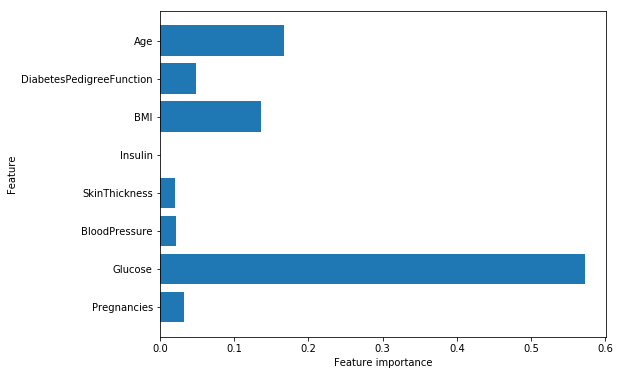

In [40]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    diabetes_features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    #plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.show()

from figure we see that "Glucose" is the most important feature.